# Importing necessery libraries

In [58]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

import seaborn as sns

import scipy.stats as stat
import pylab

import warnings
warnings.filterwarnings('ignore')



<font size = “4”> Reads the Titanic dataset from the 'train.csv' file and stores it in the `titanic_data` variable.Here we are using the train dataset to visualize and perform statistical analysis on the data.</font><font size = “4”> Reads the Titanic dataset from the 'train.csv' file and stores it in the `titanic_data` variable.Here we are using the train dataset to visualize and perform statistical analysis on the data.</font>

In [59]:

titanic_data = pd.read_csv("train.csv")
titanic_data.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [60]:
# A quick glimpse at the data
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


## Missing Values Analysis <br>
<font size="4">The dataset contains missing values, primarily in the Age, Cabin, and Embarked columns. A heatmap visualization highlights Cabin as the most affected, followed by Age and Embarked, indicating the need for specific imputation strategies. </font>

In [61]:
#Counts the number of missing values in each column of the `titanic_data` DataFrame.

titanic_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

<Axes: >

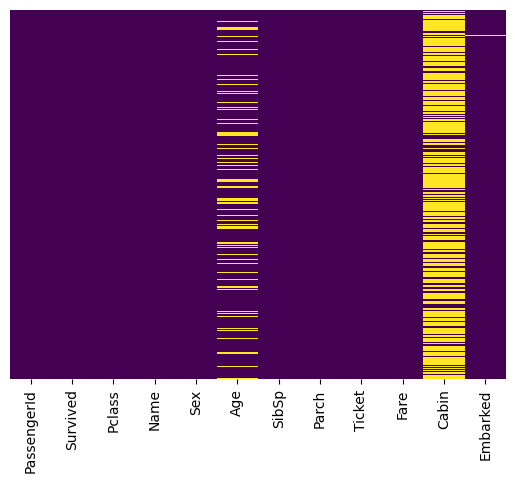

In [62]:
#Visualizes the missing values in the `titanic_data` DataFrame using a heatmap.
sns.heatmap(titanic_data.isnull(),yticklabels=False,cbar=False,cmap='viridis')

## Handling the missing values <br>

<font size = "4"> Missing values for Age were imputed using median values by passenger class, preserving age distributions within classes. Embarked missing values were filled with the most common port for passengers in similar conditions (1st class, fare between 75 and 85), maintaining data integrity.</font>


### Missing values in "Age" Column

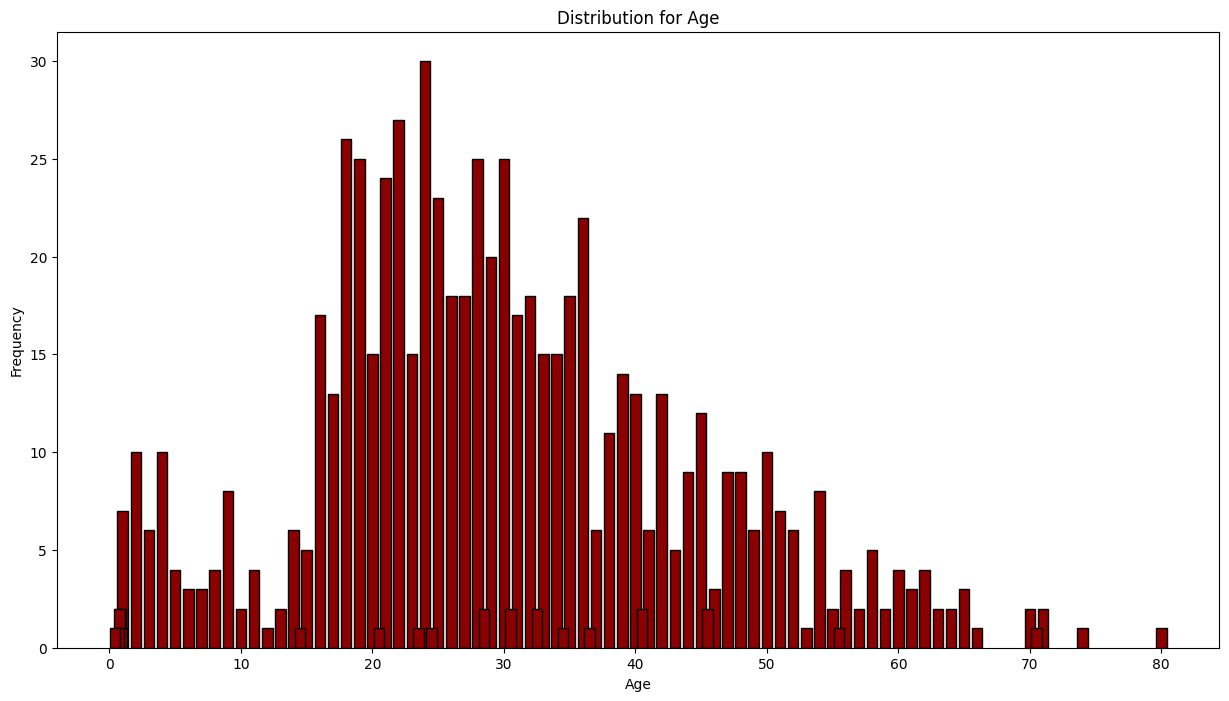

In [63]:

#Plots the distribution of ages in the Titanic dataset.
y= titanic_data['Age'].value_counts()
x=y.index.values

plt.figure(figsize=(15,8))

plt.bar(x,y,color='darkred',edgecolor = 'black')

plt.title('Distribution for Age')
plt.xlabel('Age')
plt.ylabel('Frequency')

plt.show()

<font size="4">Most passengers were between 20 and 40 years old, with class-based distribution variations. Younger passengers tended to be in lower classes, suggesting a socioeconomic trend in the demographics.</font>

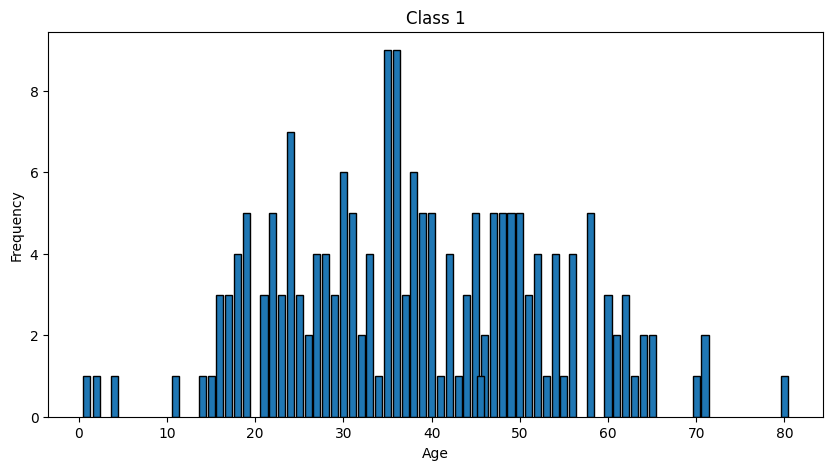

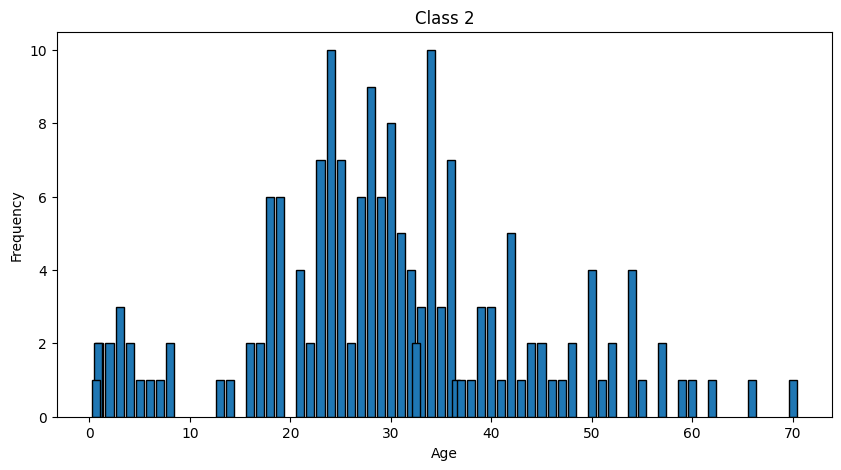

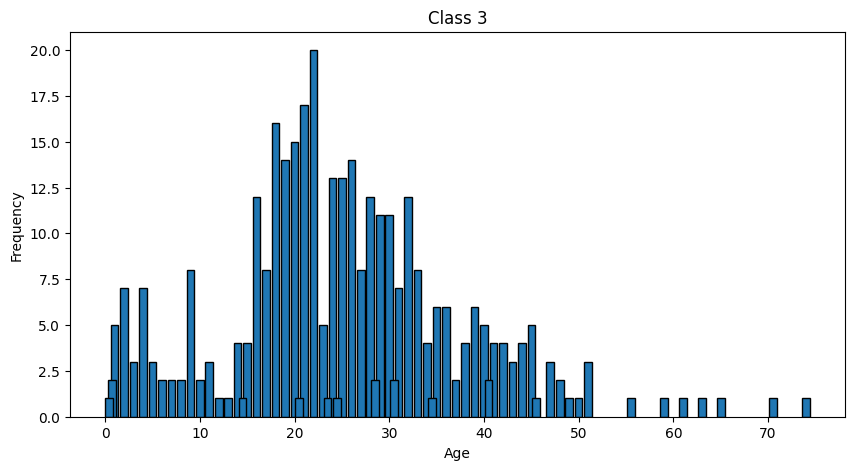

In [64]:
"""
Generates a bar plot for the age distribution of passengers in each class on the Titanic.

The function first sorts the unique passenger classes in the dataset, then iterates through each class and generates a bar plot showing the frequency of each age value for that class. The plots are displayed using Matplotlib.
"""

pclasses = sorted(titanic_data['Pclass'].unique())



for i,pclass in enumerate(pclasses):

    plt.figure(figsize=(10,5))
    
    y= titanic_data[titanic_data['Pclass'] == pclass]['Age'].value_counts()
    x=y.index.values
    
    plt.bar(x,y,edgecolor = 'black')

    plt.title(f'Class {pclass}')
    plt.xlabel('Age')
    plt.ylabel('Frequency')

    plt.show()


# Display the plot


In [65]:

#Calculates the median age for each passenger class in the Titanic dataset.
medians = titanic_data[['Pclass','Age']].groupby('Pclass').median()
medians

,Age
Pclass,
1,37.0
2,29.0
3,24.0


<font size="4">
Median age increases with class, with 3rd class being the youngest on average.
</font>


In [66]:
# Selects all rows in the `titanic_data` DataFrame where the 'Age' column is null.
titanic_data[titanic_data['Age'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
17,18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S
19,20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,NaN,C
26,27,0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,NaN,C
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,NaN,Q
...,...,...,...,...,...,...,...,...,...,...,...,...
859,860,0,3,"Razi, Mr. Raihed",male,NaN,0,0,2629,7.2292,NaN,C
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.5500,NaN,S
868,869,0,3,"van Melkebeke, Mr. Philemon",male,NaN,0,0,345777,9.5000,NaN,S
878,879,0,3,"Laleff, Mr. Kristo",male,NaN,0,0,349217,7.8958,NaN,S


In [67]:

#Imputes the missing age values for each passenger class by setting the age to the median age for that class.

for i,pclass in enumerate(pclasses):

    titanic_data.loc[(titanic_data['Pclass'] == pclass) & (titanic_data['Age'].isnull()),'Age'] = medians.values[i][0]
    
    

### Missing values in "Embarked" Column

In [68]:
## Selects all rows in the `titanic_data` DataFrame where the 'Embarked' column is null.
titanic_data[titanic_data['Embarked'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


In [69]:
titanic_data[titanic_data['Fare'] == 80.0]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


<font size="4">
Filling missing 'Embarked' values in the 'titanic_data' DataFrame with the most common 'Embarked' value for passengers who traveled in first class and paid a fare between \$75 and \$85.
</font>


In [70]:
emb = titanic_data[(titanic_data['Pclass'] == 1) & (titanic_data['Fare'] >= 75) & (titanic_data['Fare'] <= 85)]['Embarked'].value_counts().index[0]

titanic_data['Embarked'].fillna(emb, inplace= True)

In [71]:
titanic_data[titanic_data['Fare'] == 80.0]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,C
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,C


### Missing values in "Cabin" Column
<font size="4">
In the column <b> Cabin </b> approximately <b>77%</b> of the data is missing. Replacing these missing values with the letter “M”. However, this can also be dropped as there are too many nulls values.
</font>


In [72]:
#ireplacing missing values with 'M'
titanic_data['Cabin'].fillna('M', inplace= True)

### Checking for duplicate rows



In [73]:
#Counts the number of duplicate rows in the `titanic_data` DataFrame.
titanic_data.duplicated().sum()

np.int64(0)

<font size="4">
There are no duplicate rows in the dataset. So no need to remove any rows
</font>


### Creating new column name "AgeGroup"



<font size="4">
Categorizing the age of passengers on the Titanic into three groups: "Senior" for passengers over 59 years old, "Adult" for passengers between 18 and 59 years old, and "Child" for passengers 17 years old and younger.
</font>


In [74]:
def age_group(x):

    if x > 59 :
        return "Senior"
    elif x > 17 and x <= 59:
        return "Adult"
    else :
        return "Child"
    
titanic_data['AgeGroup'] = titanic_data['Age'].apply(age_group)

titanic_data.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,AgeGroup
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,M,S,Adult
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Adult
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,M,S,Adult
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Adult
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,M,S,Adult


In [75]:
#Counts the number of occurrences of each age group in the 'AgeGroup' column of the 'titanic_data' DataFrame.
titanic_data['AgeGroup'].value_counts()

AgeGroup
Adult     752
Child     113
Senior     26
Name: count, dtype: int64

## summary of the dataset

In [76]:
titanic_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.066409,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.244532,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,26.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,37.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


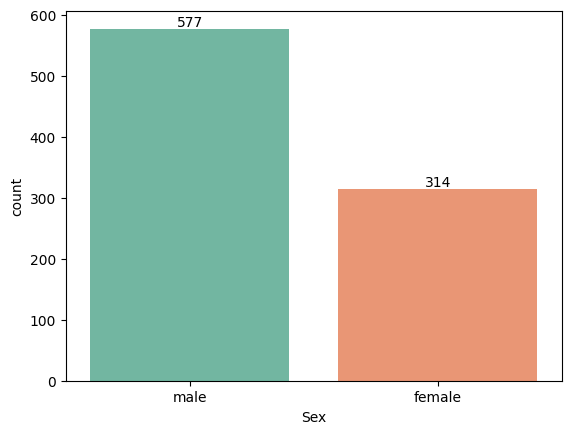

In [77]:
# Visualize the distribution of passengers by gender

ax= sns.countplot(titanic_data, x="Sex",hue="Sex",palette = "Set2")

for container in ax.containers:
    ax.bar_label(container= container, label_type='edge')

<font size="4">
The majority of passengers are male, indicating a significant gender disparity
</font>


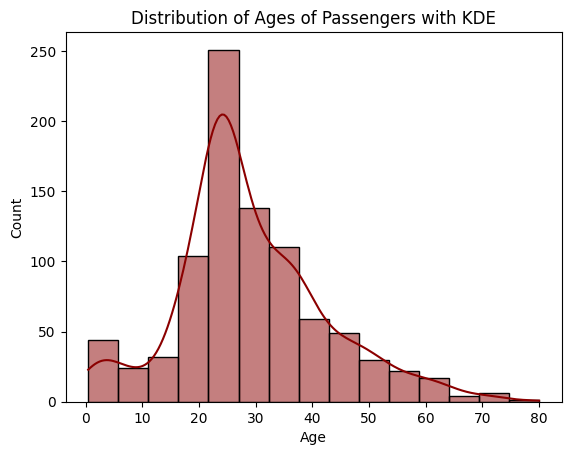

In [78]:
# distribution of Ages of Passengers with KDE
sns.histplot(data=titanic_data, x="Age", bins = 15,kde = True,color = 'darkred',alpha = 0.5)
plt.title('Distribution of Ages of Passengers with KDE')
plt.show()

<font size="4">
The age distribution is slightly <b>right-skewed</b>, with a concentration of younger passengers.
</font>


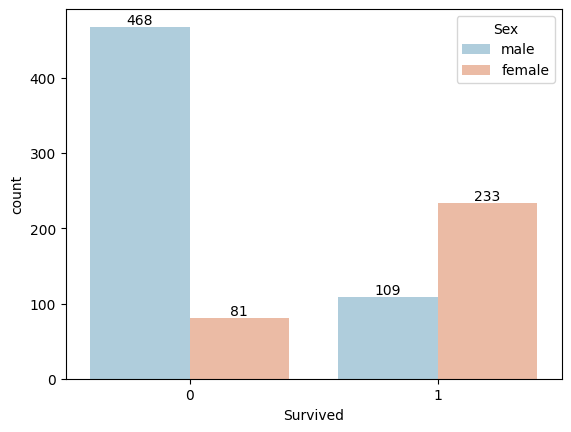

In [79]:
#Count of the number of people survived and not survived by gender
ax= sns.countplot(data=titanic_data,x='Survived',hue='Sex',palette='RdBu_r')

for container in ax.containers:
    ax.bar_label(container= container, label_type='edge')

<font size="4">
<ul>
    <li>81 women did not survive, while 233 women survived.</li>
     <li>468 men did not survive, while only 109 men survived.</li>
<b>Conclusion:</b> Significantly more women survived compared to men, suggesting a possible "women and children first" policy.
</font>


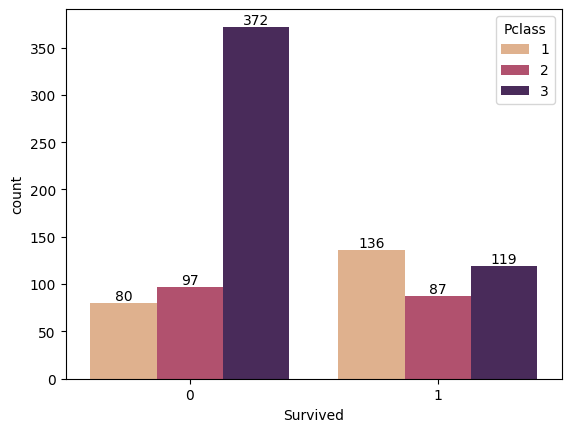

In [80]:
#Count of the number of people survived and not survived by their class
ax= sns.countplot(data=titanic_data,x='Survived',hue='Pclass',palette='flare')
for container in ax.containers:
    ax.bar_label(container= container, label_type='edge')

<font size="4">
<ul>
    <li>Class 1 (First Class): The survival rate is highest, with approximately 63% (136 out of 216) of passengers surviving. </li>
    <li>Class 2 (Second Class): The survival rate is slightly lower, at around 47% (87 out of 184) of passengers surviving.</li>
    <li>Class 3 (Third Class): The survival rate drops sharply, with only about 24% (119 out of 491) of passengers surviving.</li>
<b>Conclusion:</b> This data suggests that class played a substantial role in survival chances, with first-class passengers having a notable survival advantage over those in third class. This could indicate priority treatment or better access to lifeboats for higher-class passengers, revealing a possible socioeconomic bias in survival outcomes.
</font>

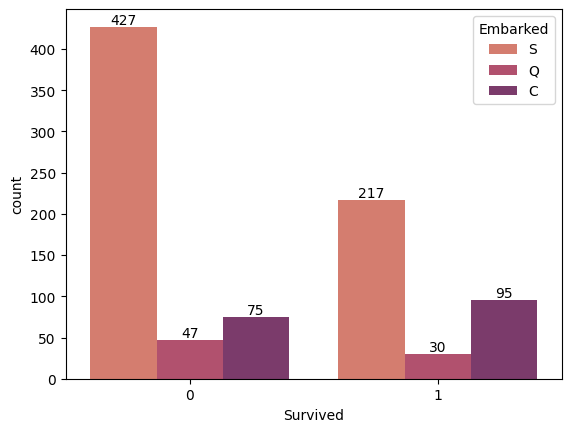

In [81]:
#Count of the number of people survived and not survived by Embarked places
ax= sns.countplot(data=titanic_data,x='Survived',hue='Embarked',palette='flare')

for container in ax.containers:
    ax.bar_label(container= container, label_type='edge')

<font size="4">
The port of embarkation seems to correlate with survival outcomes, with passengers from Cherbourg(C) having the highest likelihood of survival, while those from Southampton(S) had the lowest.This survival rate of Queenstown(Q) is lower than Cherbourg(C) but higher than Southampton(S). This difference may point to variations in passenger demographics or class distribution by port, with a higher concentration of first- and second-class passengers potentially boarding at Cherbourg(C).
</font>


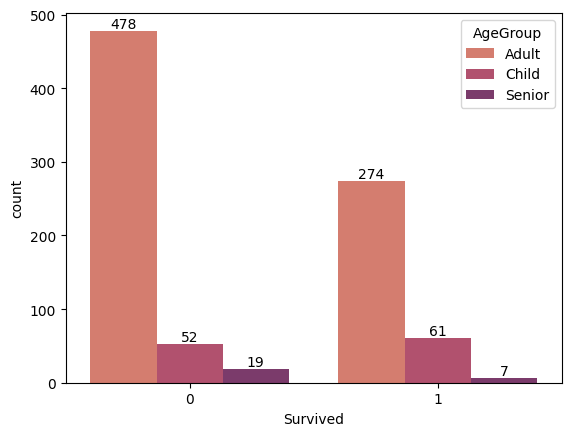

In [82]:
# Countplot of Survived vs AgeGroup
ax= sns.countplot(data=titanic_data,x='Survived',hue='AgeGroup',palette='flare')

for container in ax.containers:
    ax.bar_label(container= container, label_type='edge')

<font size="4">
This viz implies that age was a significant factor in survival, with younger passengers being prioritized for rescue over older individuals, possibly reflecting a "women and children first" protocol during the evacuation.
</font>


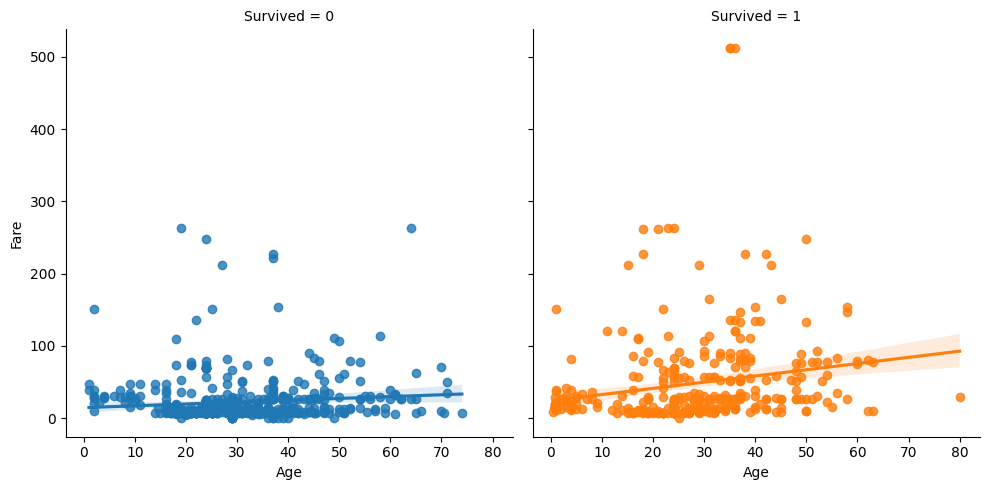

In [83]:
"""
This visualization can help identify any relationships between a passenger's age, fare paid, and whether they survived the Titanic disaster.
"""
sns.lmplot(data= titanic_data, x='Age',y= 'Fare',col='Survived',hue='Survived')

<font size="4">
While there's no strong, direct correlation between age and fare, the plot suggests that fare (which likely corresponds to class) was more influential in survival than age. Younger passengers tended to pay lower fares, but among those who survived, individuals across various ages paid higher fares.</font>


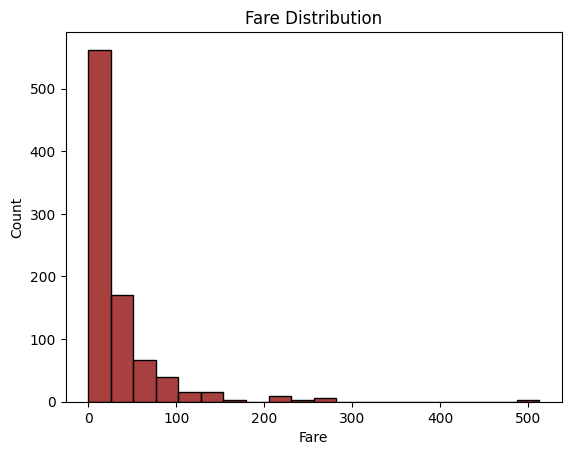

In [84]:

#Plots a histogram of the 'Fare' column from the 'titanic_data' 
sns.histplot(data=titanic_data, x="Fare", bins = 20,color='darkred')
plt.title("Fare Distribution")
plt.show()


<font size="4">
This histogram indicates a highly uneven distribution of fares on the Titanic.
</font>


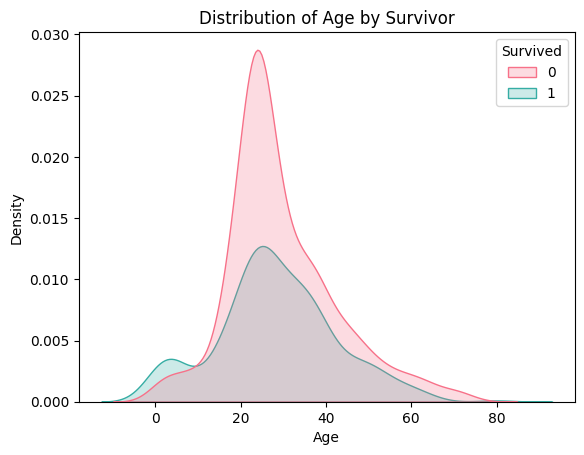

In [85]:
"""
Plots the distribution of age by survivor status using a kernel density estimation (KDE) plot.

The plot shows the density of the age distribution for both survivors and non-survivors, allowing the user to visually compare the age distributions between the two groups.
"""
sns.kdeplot(data=titanic_data,x='Age',hue='Survived',fill=True,palette="husl")
plt.title("Distribution of Age by Survivor")
plt.show()

<font size="4">
<ul>
   <li>Non-survivors (represented in pink) show a higher density in the 20–40 age range, indicating that many non-surviving passengers were within this age group.</li>
    <li>Survivors (shown in light blue) have a noticeable density in the 0–10 age range, suggesting that younger passengers had a higher chance of survival.</li>
    <li>The density for both survivors and non-survivors significantly drops after age 60, indicating fewer elderly passengers in the dataset</li>
</ul>
</font>

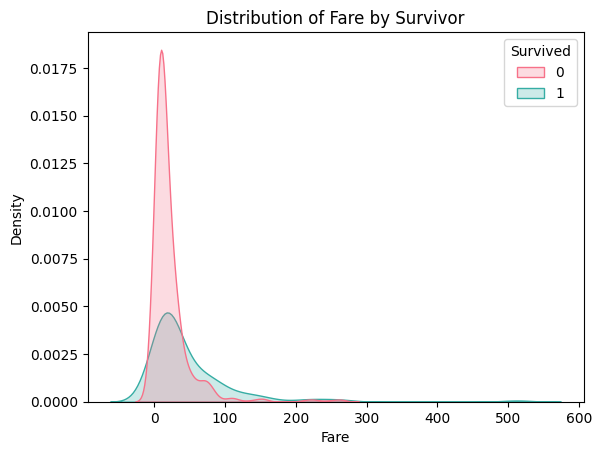

In [86]:
"""
The plot shows the probability density function of the 'Fare' feature, colored by the 'Survived' feature. This allows the user to visually compare the fare distributions between survivors and non-survivors.
"""
sns.kdeplot(data=titanic_data,x='Fare',hue='Survived',fill=True,palette="husl")
plt.title("Distribution of Fare by Survivor")
plt.show()

<font size="4">
<ul>
    <li>The spike in the plot under \$100  represents that a lot of passengers who bought the ticket within that range did not survive.</li>
    <li>When the fare exceeds approximately \$280, there is no pink shading, suggesting that either all passengers who paid above this amount survived or an outlier may be influencing our perception.</li>
</ul>
</font>


## Calculation the mean, median, and mode for the 'Fare' and 'Age' columns.

In [87]:
avg_age= titanic_data['Age'].mean()
median_age = titanic_data['Age'].median()
mode_age = titanic_data['Age'].mode()[0]

print(f"Avrage Age: {avg_age} \nMedian: {median_age} \nmode: {mode_age} ")

Avrage Age: 29.06640852974186 
Median: 26.0 
mode: 24.0 


In [88]:
avg_fare= titanic_data['Fare'].mean()
median_fare = titanic_data['Fare'].median()
mode_fare = titanic_data['Fare'].mode()[0]

print(f"Avrage Fare: {avg_fare} \nMedian: {median_fare} \nmode: {mode_fare} ")

Avrage Fare: 32.204207968574636 
Median: 14.4542 
mode: 8.05 


## T-Test
<font size="4">
<p>A two-sample t-test was performed to compare the survival rates between male and female passengers on the Titanic.</p>
<p>The t-test is a statistical test used to determine if the means of two groups are significantly different from each other. In this case, it is used to test if the survival rate of male passengers is significantly different from the survival rate of female passengers.</p>

Here, the 'Survived' values for male and female passengers are first extracted from the 'titanic_data' DataFrame. It then uses the <b>`stats.ttest_ind()`</b> function from the SciPy library to perform the t-test and returns the t-test statistic and the p-value.<br>

The t-test statistic indicates the magnitude of the difference between the two means, while the p-value represents the probability of observing the given difference (or a more extreme difference) if the null hypothesis (that the two means are equal) is true.
<ul
<li><b>Hypotheses:</b></li>
<ul> 
    <li><b>Null Hypothesis (H<sub>0</sub>):</b> There is no significant difference in survival rates between male and female passengers.</li>
    <li><b>Alternative Hypothesis (H<sub>1</sub>):</b> There is a significant difference in survival rates between male and female passengers.</li>
</ul>
</ul
>
</font>

In [89]:
"""
Performs a two-sample t-test to compare the survival rates between male and female passengers on the Titanic.

The t-test is used to determine if there is a statistically significant difference in the mean survival rates between male and female passengers. The p-value is used to assess the statistical significance of the difference.
"""
from scipy import stats

male_survival = titanic_data[titanic_data['Sex'] == 'male']['Survived']
female_survival = titanic_data[titanic_data['Sex'] == 'female']['Survived']

t_test, p_value = stats.ttest_ind(male_survival,female_survival)

print("T-test statistics: ",t_test)
print("P value: ",p_value)

T-test statistics:  -19.297816550123354
P value:  1.4060661308802591e-69


#### Based on the provided p-value,the conclusion is as follows:
As <i>p</i><b><0.05</b>, the null hypothesis is rejected, indicating a significant difference in survival rates between genders


## Chi-Square Test
<font size="4">
<p>As “Survived” and “Gender” both are categorical columns. Therefore, performing a Chi<sup>2</sup>-Test would be preferable. The Chi<sup>2</sup>-Test is used to determine whether there is a statistically significant relationship between two categorical variables.</p>
<p>The <b>`stats.chi2_contingency()`</b> function calculates the chi-square statistic and p-value for the given observed contingency table. </p>
<p>The p-value represents the probability of observing the given test statistic (or a more extreme value) under the null hypothesis of independence. </p>

<p>If the p-value is less than the chosen significance level (e.g. 0.05), we can reject the null hypothesis and conclude that the two variables are related. </p>

<ul
<li><b>Hypotheses:</b></li>
<ul> 
    <li><b>Null Hypothesis (H<sub>0</sub>):</b>  Survival and gender are independent (no association).</li>
    <li><b>Alternative Hypothesis (H<sub>1</sub>):</b> Here is an association between survival and gender.</li>
</ul>
</ul
>

</font>


In [90]:
"""
Generates a cross-tabulation (contingency table) of the 'Survived' and 'Sex' columns from the 'titanic_data' DataFrame.

The resulting table shows the count of passengers for each combination of survival status and sex.
"""
count_table = pd.crosstab(titanic_data['Survived'],titanic_data['Sex'])
count_table

Sex,female,male
Survived,,
0,81,468
1,233,109


In [91]:
"""
Retrieves the observed values from the count_table.
"""
observed = count_table.values
observed

array([[ 81, 468],
       [233, 109]])

In [92]:

#Performs a chi-square test of independence on the observed contingency table.

chi_square_statistics, p_value,_,_ = stats.chi2_contingency(observed)

print("Chi-square statistics: ",chi_square_statistics)
print("P value: ",p_value)

Chi-square statistics:  260.71702016732104
P value:  1.1973570627755645e-58


#### p-value is below 0.05, the null hypothesis is rejected, suggesting a relationship between gender and survival. Suggesting there's a significant difference in survival rate based on gender.
